# Lab 3 - Distance Metrics and Clustering


### Non-Euclidean Distance Metrics

We are most familiar with the typical Euclidian distance metric, ie: given two vectors $\overline{v_1} = [x_1, y_1]$ and $\overline{v_2} = [x_2, y_2]$, the distance $D$ between them is $\sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}$. This is generalized for $N$-sized vectors $\overline{a} = [a_1, ..., a_N]$ and $\overline{b} = [b_1, ..., b_N]$ with the following formula:
$$
D = \sqrt{\sum_{i = 1}^{N}(a_i - b_i)^2}
$$

There are other metrics which may be useful, depending on the type of analysis you wish to do. The *Hamming Distance*, $D_H$ is useful when analyzing categorical data:
$$
D_H = \frac{\sum_{i = 1}^{N}|a_i - b_i|}{N}
$$

The *Block Distance*, $D_B$, is useful for calculating distance when only straight paths parallel to your axes are allowed, eg: while navigating through blocks in a large city:
$$
D_B = \sum_{i = 1}^{N}|a_i - b_i|
$$

The *Minkowski Distance*, $D_M$,  is a generalized metric that reduces to the block and euclidean distances for $p=1$ and $p=2$, respectively. The value of $p$ can vary by application and is generally tuned by experiment - it can be used for applications ranging from analysing the quality of mibile networks to calculating distances in curved space:
$$
D_M = \big(\sum_{i = 1}^{N}(a_i - b_i)^p\big)^{1/p}
$$

#### Example 1: Distance calculation with varying metrics

Use the **Euclidean**, **Block**, and **Minkowski** (p=3 and p=4) distance formulas to calculate the distance between the two vectors given below. You may change the values contained in the vectors to see how their distances respond relative to eachother.

In [ ]:
import numpy as np

vec1 = np.array([1.2, 5.7, 6.1, 2.8, 1.1, 14.8])
vec2 = np.array([5.1, 6.0, 1.3, 28.3, 14.4, -11.9])
Euclidean = np.power(np.sum(np.square((vec1-vec2))),0.5)
Block = np.sum(np.abs(vec1-vec2))
p = 3
Minikowski_1 = np.power(np.sum(np.power((vec1-vec2),p)),1/p)
p = 4
Minikowski_2 = np.power(np.sum(np.power((vec1-vec2),p)),1/p)
print(Euclidean)
print(Block)
print(Minikowski_1)
print(Minikowski_2)

39.72870498770379
74.5
5.3297367244266765
31.32684511108333


### Clustering with K-Means

"Clustering" is a method by which a set of *N* vectors can be subdivided into groups, based on the relative "closeness" of one vector to the surrounding vectors. This is done with the "*k*-means algorigthm", and can be seperated into three main parts:
- Check if the data can be clustered. If so, how many clusters are there?
- Determine a point's association with surrounding clusters.
- Repeat until clustering is optimized as much as possible.

Consider *N* vectors of length *n*, $\overline{x_1} = [x_{1, 1}, ..., x{1, n}], ..., \overline{x_N} = [x_{N, 1}, ..., x{N, n}]$. Let there be *k* clusters, labeled $1, ..., k$. We specify the cluster assignment of a given vector by defining an *N*-sized vector, $\overline{c} = [c_1, ..., c_N]$, where $c_i = 1, ..., k$ is the cluster assignment for vector $\overline{x_i}$. The contents of a given cluster can then be defined as $G_j = \{i : c_i = j\}$, with $i$ the number of the cluster.

For each group $G_i$, define a "group-representative $n$-vector" $\overline{z_i}$. We want this representative to be as close to other points in the cluster as possible, so we seek to minimize the distance between representative and cluster points (ie: minimize the quantity $||\overline{x_i} - \overline{z_{c_i}}||$). 

To evaluate a given choice of clustering, we use the mean square distance from the vectors to their associated representatives:
$$
J^{clust} = \frac{(||\overline{x_1} - \overline{z_{c_1}}||^2 + ... + ||\overline{x_N} - \overline{z_{c_N}}||^2)}{N}
$$
For optimal clustering, we seek to make $J^{clust}$ as small as possible. We can select $c_i$ to minimize each term: for each data vector $x_i$, select $c_i$ such that $||x_i - z_j||$ is minimized over all $j$. ie: assign each vector $x_i$ to its nearest neighbor amongst the group representatives.

The best group assignment is then the one that minimizes $J^{clust}$. By the above logic, we have 
$$
||x_i - z_{c_i}|| = min_{j = 1, ..., k}||x_i - z_j||
$$
so then
$$
J^{clust} = \frac{(min_{j = 1, ..., k}||x_1 - z_j||^2 + ... + min_{j = 1, ..., k}||x_N - z_j||^2)}{N}
$$

### SciKit-Learn `KMeans()`

The `KMeans()` function in the `sklearn.cluster` package can help to easily identify the cluster centers. The documentation for this function can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

Given a `numpy` array, you can run the `KMeans()` function to produce an initial cluster grouping. You will need to specify a guess at a number of clusters (`n_clusters`) and  a random state (`random_state`). An example of how to do this is shown in the documentation. 

Once the *k*-means operation is run, you can determine cluster membership using the `.labels_` attribute (ie: if you set `kmeans = KMeans(...).fit(X)` with point-array `X`, `kmeans.labels_` returns an array with the group numbers for each point). The `.cluster_centers_` attribute returns the cluster center location for each cluster. The `.predict()` function will predict the cluster membership of any additional points you want to add in or test.

#### Example 2: Find the number of darts players.
Several darts players are throwing darts at a $10\times10$ meter board. The points they hit are stored in the `darts` array below as *x*-*y* coordinate pairs. Guess the number of clusters, *k* - this corresponds to the number of darts players there are. You may want to plot the data to confirm your guess visually.

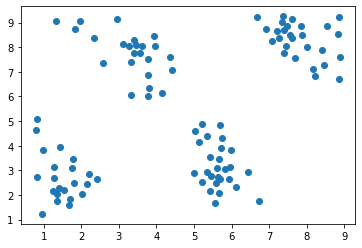

In [ ]:
%matplotlib inline


import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


darts = np.array([[1.369, 1.764], [1.250, 2.148], [1.369, 2.046], [1.408, 2.276],
                    [1.547, 2.199], [1.805, 2.480], [1.765, 3.094], [1.289, 3.120], 
                    [0.833, 2.736], [1.686, 1.585], [2.023, 2.046], [1.289, 2.685],
                    [1.706, 1.841], [0.952, 1.227], [3.631, 8.030], [3.769, 7.519],
                    [3.571, 7.749], [3.968, 8.056], [3.769, 6.879], [4.404, 7.059],
                    [4.365, 7.621], [2.579, 7.340], [3.333, 6.061], [3.333, 7.391],
                    [3.412, 8.286], [3.948, 8.439], [5.694, 2.659], [5.813, 3.069],
                    [5.932, 2.634], [5.000, 2.890], [5.436, 2.148], [5.456, 2.762],
                    [5.218, 2.506], [5.654, 2.097], [6.111, 2.327], [5.575, 2.480],
                    [5.555, 1.687], [6.726, 1.739], [6.428, 2.915], [5.714, 3.887],
                    [5.753, 4.322], [5.992, 3.810], [5.436, 3.554], [5.218, 4.884], 
                    [5.019, 4.578], [5.337, 4.373], [5.694, 4.833], [2.420, 2.659],
                    [1.785, 3.478], [2.202, 2.838], [2.162, 2.455], [1.448, 3.938],
                    [0.813, 5.063], [0.793, 4.629], [0.992, 3.836], [3.789, 6.010],
                    [4.146, 6.138], [3.809, 6.342], [1.329, 9.053], [1.825, 8.746],
                    [1.964, 9.053], [2.341, 8.388], [2.956, 9.130], [5.138, 4.169], 
                    [7.341, 9.028], [7.400, 8.695], [7.480, 8.874], [6.924, 8.746],
                    [7.261, 8.388], [7.559, 8.516], [8.015, 8.005], [7.876, 8.491], 
                    [7.460, 8.056], [5.615, 3.094], [5.654, 3.478], [5.952, 3.120], 
                    [5.337, 2.915], [5.635, 2.736], [3.274, 8.030], [3.452, 8.107], 
                    [3.392, 7.774], [3.115, 8.132], [7.083, 8.235], [7.400, 7.749], 
                    [7.837, 8.849], [6.686, 9.207], [7.202, 8.670], [7.361, 9.258], 
                    [7.619, 8.363], [7.599, 9.130], [8.829, 8.542], [8.849, 9.232], 
                    [8.551, 8.849], [8.392, 7.877], [8.888, 7.595], [8.869, 6.700], 
                    [8.174, 7.109], [8.452, 7.263], [8.214, 6.828], [7.698, 7.544]])

plt.scatter(darts[:, 0], darts[:, 1])

Run the *k*-means algorithm to calculate and minimize the mean square distance from the vectors to their associated representatives, $J^{clust}$. The goal is to get $J^{clust}$ as small as possible, so that each point is in its most optimal grouping. After optimizing the groups, plot the points and use colors to show which cluster a given point is a member of.

Try this for your chosen *k*-value and other nearby *k*-values to confirm your choice of *k*. 

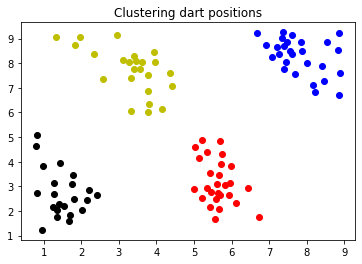

In [1]:
%matplotlib inline


import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


darts = np.array([[1.369, 1.764], [1.250, 2.148], [1.369, 2.046], [1.408, 2.276],
                    [1.547, 2.199], [1.805, 2.480], [1.765, 3.094], [1.289, 3.120], 
                    [0.833, 2.736], [1.686, 1.585], [2.023, 2.046], [1.289, 2.685],
                    [1.706, 1.841], [0.952, 1.227], [3.631, 8.030], [3.769, 7.519],
                    [3.571, 7.749], [3.968, 8.056], [3.769, 6.879], [4.404, 7.059],
                    [4.365, 7.621], [2.579, 7.340], [3.333, 6.061], [3.333, 7.391],
                    [3.412, 8.286], [3.948, 8.439], [5.694, 2.659], [5.813, 3.069],
                    [5.932, 2.634], [5.000, 2.890], [5.436, 2.148], [5.456, 2.762],
                    [5.218, 2.506], [5.654, 2.097], [6.111, 2.327], [5.575, 2.480],
                    [5.555, 1.687], [6.726, 1.739], [6.428, 2.915], [5.714, 3.887],
                    [5.753, 4.322], [5.992, 3.810], [5.436, 3.554], [5.218, 4.884], 
                    [5.019, 4.578], [5.337, 4.373], [5.694, 4.833], [2.420, 2.659],
                    [1.785, 3.478], [2.202, 2.838], [2.162, 2.455], [1.448, 3.938],
                    [0.813, 5.063], [0.793, 4.629], [0.992, 3.836], [3.789, 6.010],
                    [4.146, 6.138], [3.809, 6.342], [1.329, 9.053], [1.825, 8.746],
                    [1.964, 9.053], [2.341, 8.388], [2.956, 9.130], [5.138, 4.169], 
                    [7.341, 9.028], [7.400, 8.695], [7.480, 8.874], [6.924, 8.746],
                    [7.261, 8.388], [7.559, 8.516], [8.015, 8.005], [7.876, 8.491], 
                    [7.460, 8.056], [5.615, 3.094], [5.654, 3.478], [5.952, 3.120], 
                    [5.337, 2.915], [5.635, 2.736], [3.274, 8.030], [3.452, 8.107], 
                    [3.392, 7.774], [3.115, 8.132], [7.083, 8.235], [7.400, 7.749], 
                    [7.837, 8.849], [6.686, 9.207], [7.202, 8.670], [7.361, 9.258], 
                    [7.619, 8.363], [7.599, 9.130], [8.829, 8.542], [8.849, 9.232], 
                    [8.551, 8.849], [8.392, 7.877], [8.888, 7.595], [8.869, 6.700], 
                    [8.174, 7.109], [8.452, 7.263], [8.214, 6.828], [7.698, 7.544]])

kmeans = KMeans(n_clusters=4, random_state=0, max_iter=3).fit(darts)
clusters = kmeans.labels_
k=0
plt_color = ['r','b','k','y','g','c']
for i in np.unique(clusters):
        indx = np.where(clusters==i)[0]
        plt.scatter(darts[indx,0],darts[indx,1],c=plt_color[k])
        k = k + 1
plt.title('Clustering dart positions')
plt.show()

### Regression with K-Nearest Neighbors

Now that we know how to determine clusters, let's develop a method by which additional points can be classified as belonging to one of the groups. The "K-Nearest Neighbors" algorithm (or KNN for short) can be used for both classification and regression - it can be used to guess the value of a new point based on its similarity to surrounding points. The algorithm is as follows:
- First, find the distance between the new point and all surrounding points.
- Select the closest *k* data points - this is a different *k*-value than the one used to number groups in the previous section!
- Use the average of these *k* datapoints to calculate the predicted value of the new point.

The *k*-value is key in determining an accurate prediction based on the data. This value can be optimized using the training data - by plugging in various given points to the KNN algorithm, we can calculate the error for our chosen *k*. This is simply the difference between the actual and predicted value.

#### Example 3: Different Classes of Irises
Consider the following dataset containing data about irises. The attributes contained in the dataset are as follows:
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
 - Iris Setosa
 - Iris Versicolour
 - Iris Virginica

The data has been imported for your convenience below, as well as several steps to walk you through how the classification is done. Try changing the *k*-value (the number of nearest neighbors evaluated, preset as `n_neighbors=5`) to see how the class predictions change. Predict the class of a new iris with sepal length of $5.01cm$, sepal width of $3.72cm$, petal length of $1.23cm$, and petal width of $0.31cm$. This should be the only bit of wholly new code you need to add at the bottom.


The data was used as a courtesy of the UCI Machine Learning Repository, from the [Irises Dataset](https://archive.ics.uci.edu/ml/datasets/Iris).


**References**:

Blake, C. L. and Merz, C. J. 1998. “UCI repository of machine learning databases”. University of California. Available online at: http://www.ics.uci.edu/∼mlearn/MLRepository.html

Robinson, S. "K-Nearest Neighbors Algorithm in Python and Scikit-Learn". StackAbuse.com. Available online at: https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign column names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)

# Shows the first 5 entries in the dataset (only works if code below the following line is commented out)
print(dataset.head())

# Split dataset into values and labels
my_data = np.array(dataset.iloc[:, :-1].values)
classifications = np.array(dataset.iloc[:, 4].values)

# Split the values into train and test groups - 80% train and 20% test
from sklearn.model_selection import train_test_split
data_train, data_test, class_train, class_test = train_test_split(my_data, classifications, test_size=0.20)

# Use Sci-Kit to create a classification of the training data
# here, we set k=5 to classify points based on 5 nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(data_train, class_train)

# Now lets make predictions of the classifications of our test data
predicted_class = classifier.predict(data_test)
# Predicted versus test classes
print(predicted_class == class_test)
print(class_test)

### Now predict the class of a new iris with the following attributes:
# - sepal length of 5.01cm
# - sepal width of 3.72cm
# - petal length of 1.23cm
# - petal width of 0.31cm
# You will need to input the values into a numpy array, then use the classifier.predict() function as above

'''
Insert Code Here
'''

new_point = np.array([[5.01, 3.72, 1.23, 0.31]])
print(classifier.predict(new_point))

   sepal-length  sepal-width  petal-length  petal-width        Class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
[ True  True  True  True  True  True  True  True False  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]
['Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virgini